##### Uploading data from kaggle

In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/competitions/titanic/data?select=train.csv")

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


### Importing Libraries

In [2]:
#importing the liberaries that w'll use
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

### Reading data 

In [3]:
data = pd.read_csv('titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####  Splitting data into train and test 

In [5]:
X = data.drop('Survived',axis=1)
y = data['Survived']
X_train , X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2 )

####  Exploring and transforming the data

In [6]:
df_train = X_train
df_test = X_test
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
105,106,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
265,266,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
516,517,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
603,604,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
55,56,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 105 to 705
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          568 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        163 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [8]:
df_train.shape

(712, 11)

In [9]:
def drop_col(data):
    data = data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
    return data 

In [10]:
df_train = drop_col(df_train)

In [11]:
df_test = drop_col(df_test)

In [12]:
df_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,568.000000,712.000000,712.000000,712.000000
mean,2.318820,29.474190,0.539326,0.387640,31.813822
std,0.830694,14.040716,1.140545,0.810455,47.358382
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.875000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.479150
75%,3.000000,38.000000,1.000000,0.000000,31.068750
max,3.000000,71.000000,8.000000,6.000000,512.329200


In [13]:
medfair = df_train.describe()['Fare']['50%']

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


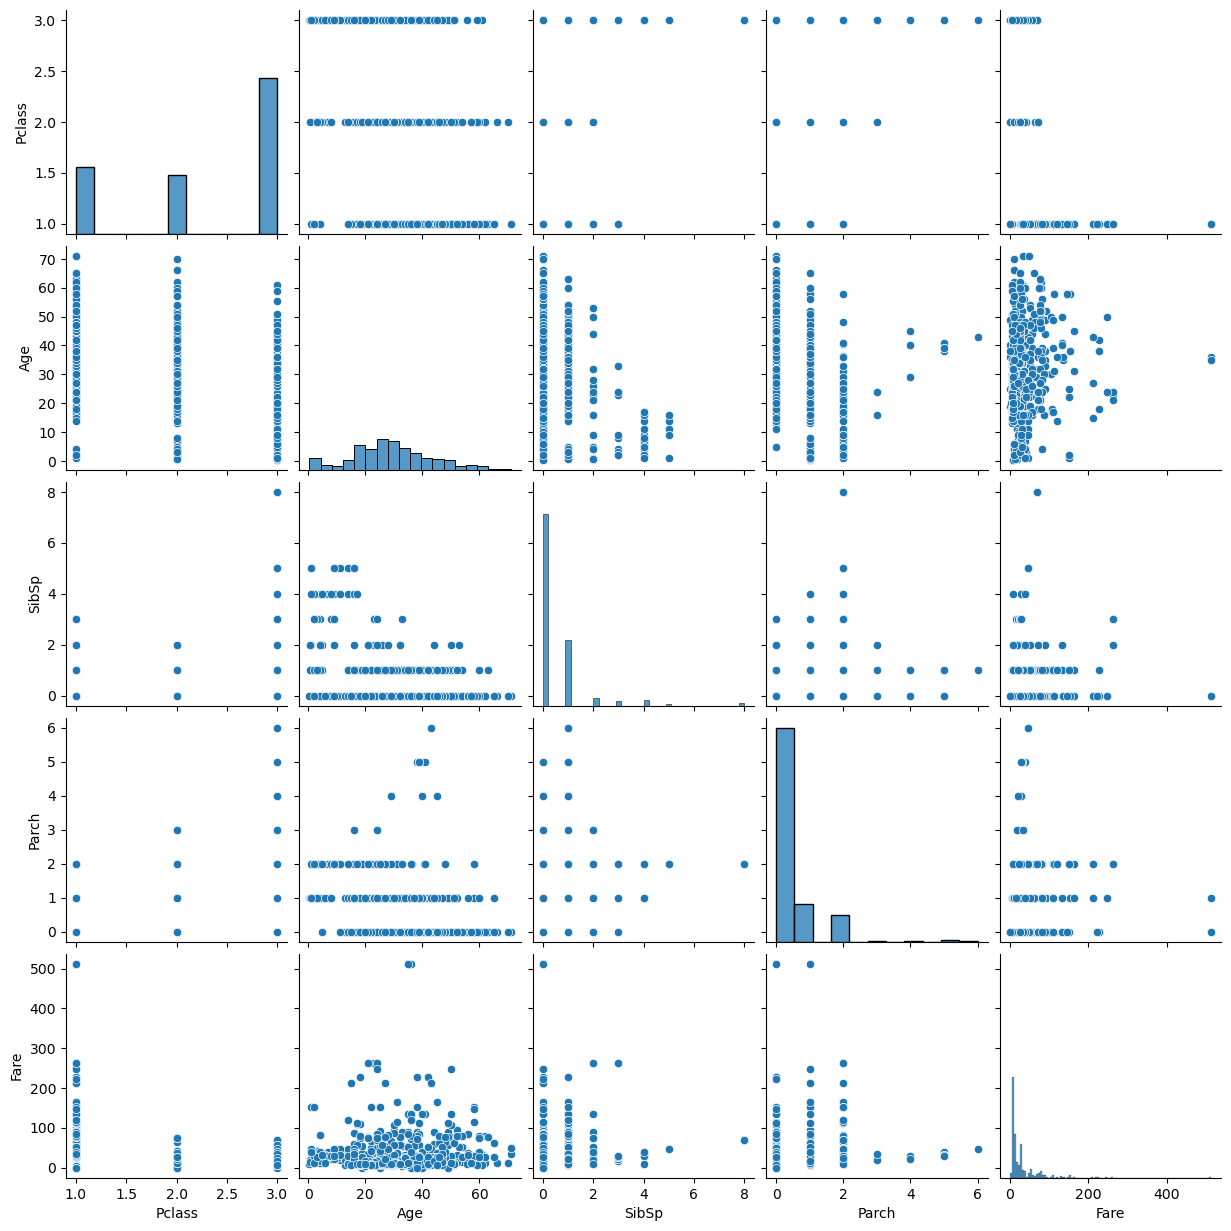

In [14]:
sns.pairplot(df_train);

<Axes: xlabel='Age', ylabel='Count'>

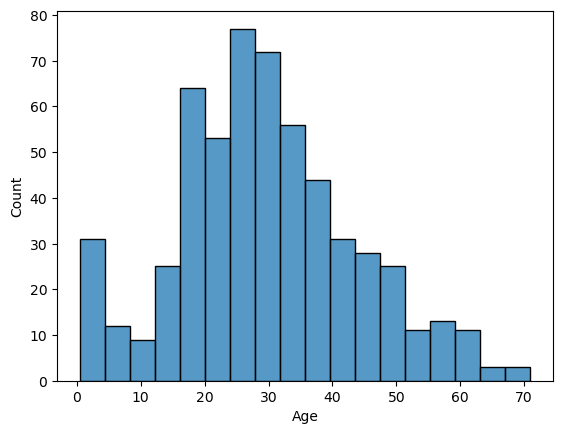

In [15]:
sns.histplot(df_train['Age'])

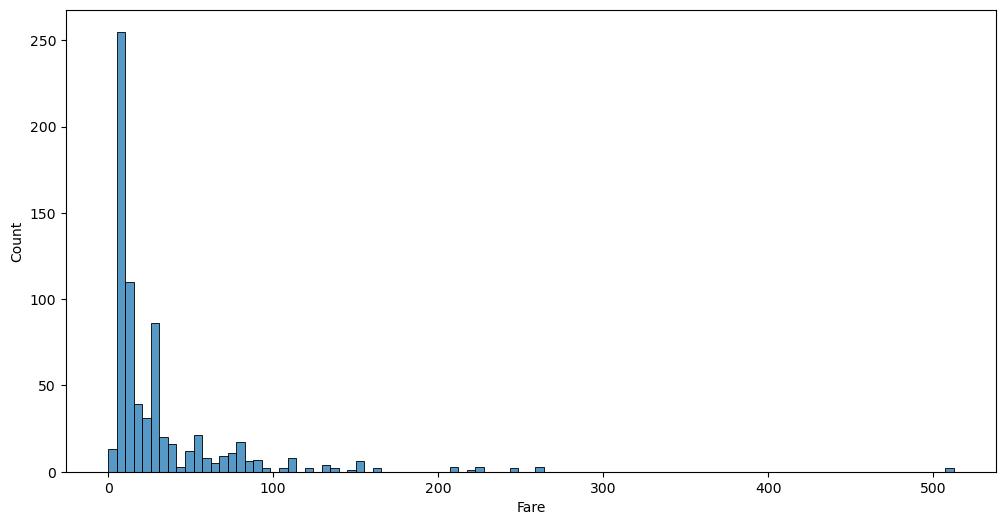

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(df_train['Fare']);